<a href="https://colab.research.google.com/github/nazuma123/Machine-Learning/blob/main/PLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv('/content/Position_Salaries.csv')
df = df.drop(['Position'],axis=1)
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [ ]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

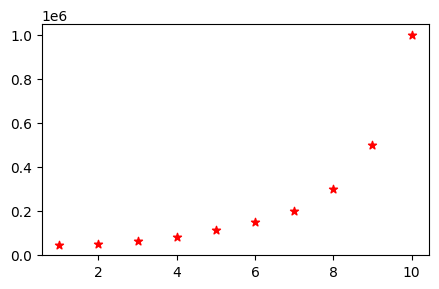

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X , y = y , color = 'r' , marker = '*')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.coef_

array([80878.78787879])

In [ ]:
reg.intercept_

np.float64(-195333.33333333337)

In [ ]:
# data (curve) -> y = mx+c -> model (y = 80878.78787879 * x - 195333.33333333337)

In [ ]:
predictions = reg.predict(X)
predictions

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

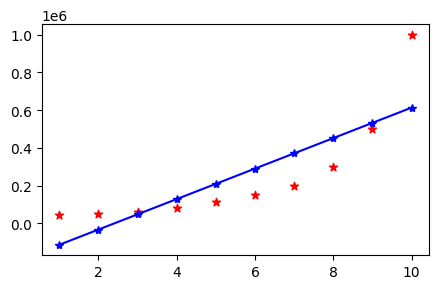

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X , y = y , color = 'r' , marker = '*')
plt.plot(X , predictions,color = 'b',marker='*')
plt.show()

**Polynomial Process**

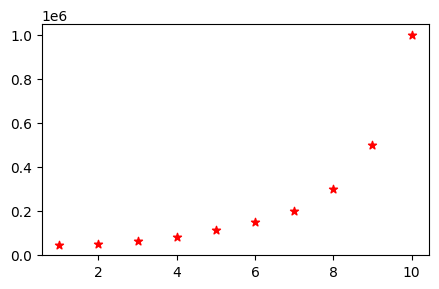

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X , y = y , color = 'r' , marker = '*')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X)
poly_results = poly_reg.transform(X)

In [ ]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
poly_results

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(poly_results,y)

LinearRegression()

In [ ]:
predictions = reg.predict(poly_results)

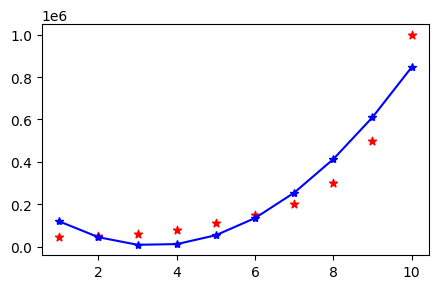

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X , y = y , color = 'r' , marker = '*')
plt.plot(X , predictions,color = 'b',marker='*')
plt.show()

**case_1**

In [ ]:
df = pd.read_csv('/content/case_1.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
print(f'{reg.coef_} * x + {reg.intercept_}')

[6853.4545736] * x + 32537.52840117628


In [ ]:
predictions = reg.predict(X)


In [ ]:
from sklearn.metrics import r2_score
print(f'Accuracy by r2_score was : {r2_score(y , predictions)}')

Accuracy by r2_score was : 0.7020755183418668


In [ ]:
X.shape[1]

1

In [ ]:
value = 1 - ( (1 - r2_score(y,predictions)) * (len(df) - 1) ) / (len(df) - X.shape[1] - 1)
print(f'Accuracy by Adjusted r2_score was : {value}')

Accuracy by Adjusted r2_score was : 0.6791582505220104


**case_2**

In [ ]:
df = pd.read_csv('/content/case_2.csv')
df

,YearsExperience,Salary,Height
0,1.1,39343.0,1.47
1,1.3,46205.0,1.50
2,1.5,37731.0,1.52
3,2.0,43525.0,1.55
4,2.2,39891.0,1.57
5,2.9,56642.0,1.60
6,3.0,60150.0,1.63
7,3.2,54445.0,1.65
8,3.2,64445.0,1.68
9,3.7,57189.0,1.70


In [ ]:
X = df[['YearsExperience','Height']]
y = df['Salary']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
print(f'{reg.coef_} * x + {reg.intercept_}')

[ 14644.63233411 -77180.11347421] * x + 136770.40050132194


In [ ]:
predictions = reg.predict(X)


In [ ]:
from sklearn.metrics import r2_score
print(f'Accuracy by r2_score was : {r2_score(y , predictions)}')

Accuracy by r2_score was : 0.7388592596500807


In [ ]:
X.shape[1]

2

In [ ]:
value = 1 - ( (1 - r2_score(y,predictions)) * (len(df) - 1) ) / (len(df) - X.shape[1] - 1)
print(f'Accuracy by Adjusted r2_score was : {value}')

Accuracy by Adjusted r2_score was : 0.6953358029250942


In [ ]:
# overfitting problem = If the model is working well with training data and not working
# well with test data is known as overfitting problem
# ex: Train Accuracy = 95 %
#     Test Accuracy = 60%

# underfitting problem = If the model is not working well with training data and not working
# well with test data is known as underfitting problem
# ex: Train Accuracy = 65 %
#     Test Accuracy = 40%

**Regularization**

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')
df = df.drop(['id','date'],axis=1)
X = df.iloc[: , 1:]
y = df.iloc[: , 1]

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
reg.coef_

array([ 1.00000000e+00, -3.16643016e-16, -6.04831823e-13,  7.74867889e-19,
        1.85308953e-17,  7.79290646e-17,  9.85709303e-17, -1.26241403e-16,
        3.16380580e-17,  6.04829745e-13,  6.04832750e-13,  6.52467336e-16,
       -2.91155749e-18,  1.07018950e-16, -8.91940214e-17,  2.24235303e-16,
       -6.58274355e-18, -1.49470796e-18])

In [ ]:
t = pd.DataFrame()
t['Column_Names'] = X.columns
t['M_values'] = reg.coef_

In [ ]:
t

,Column_Names,M_values
0,bedrooms,1.000000e+00
1,bathrooms,-3.166430e-16
2,sqft_living,-6.048318e-13
3,sqft_lot,7.748679e-19
4,floors,1.853090e-17
5,waterfront,7.792906e-17
6,view,9.857093e-17
7,condition,-1.262414e-16
8,grade,3.163806e-17
9,sqft_above,6.048297e-13


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X,y)

Ridge()

In [ ]:
t['Ridge_M_values'] = ridge_reg.coef_

In [ ]:
t

,Column_Names,M_values,Ridge_M_values
0,bedrooms,1.000000e+00,9.999116e-01
1,bathrooms,-3.166430e-16,2.977928e-05
2,sqft_living,-6.048318e-13,3.976577e-08
3,sqft_lot,7.748679e-19,-5.926824e-11
4,floors,1.853090e-17,-4.575646e-06
5,waterfront,7.792906e-17,-3.609136e-05
6,view,9.857093e-17,-7.418023e-06
7,condition,-1.262414e-16,3.880888e-06
8,grade,3.163806e-17,-1.299281e-05
9,sqft_above,6.048297e-13,1.280652e-08


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X,y)

Lasso()

In [ ]:
t['Lasso_M_values'] = lasso_reg.coef_

In [ ]:
t

,Column_Names,M_values,Ridge_M_values,Lasso_M_values
0,bedrooms,1.000000e+00,9.999116e-01,0.000000e+00
1,bathrooms,-3.166430e-16,2.977928e-05,0.000000e+00
2,sqft_living,-6.048318e-13,3.976577e-08,6.374610e-04
3,sqft_lot,7.748679e-19,-5.926824e-11,-7.085412e-07
4,floors,1.853090e-17,-4.575646e-06,-0.000000e+00
5,waterfront,7.792906e-17,-3.609136e-05,-0.000000e+00
6,view,9.857093e-17,-7.418023e-06,-0.000000e+00
7,condition,-1.262414e-16,3.880888e-06,0.000000e+00
8,grade,3.163806e-17,-1.299281e-05,-0.000000e+00
9,sqft_above,6.048297e-13,1.280652e-08,-0.000000e+00
